#Classico event EDA

### Libraries

In [22]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Display plots inline
%matplotlib inline



### Step 2: Download the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Step 3: Load the Data Section



In [3]:
import pandas as pd

file_path = '/content/drive/My Drive/MATCH-RESULTS.csv'
df = pd.read_csv(file_path)


In [4]:

# Display the first five rows of the dataframe
df.head()

,Competition_Name,Gender,Country,Season_End_Year,Round,Wk,Day,Date,Time,Home,HomeGoals,Home_xG,Away,AwayGoals,Away_xG,Attendance,Venue,Referee,Notes,MatchURL
0,La Liga,M,ESP,2019,NaN,1,Sat,2022-08-13,21:00,Barcelona,0,1.9,Rayo Vallecano,0,0.5,81104,Camp Nou,Alejandro Hernández,NaN,https://fbref.com/en/matches/cbe0a303/Barcelon...
1,La Liga,M,ESP,2019,NaN,1,Sun,2022-08-14,22:00,Almería,1,0.7,Real Madrid,2,2.1,14386,Power Horse Stadium,Juan Martínez,NaN,https://fbref.com/en/matches/c1e42359/Almeria-...
2,La Liga,M,ESP,2019,NaN,10,Wed,2022-10-19,21:00,Elche,0,0.8,Real Madrid,3,1.5,30236,Estadio Manuel Martínez Valero,Jesús Gil,NaN,https://fbref.com/en/matches/8cccf9d8/Elche-Re...
3,La Liga,M,ESP,2019,NaN,10,Thu,2022-10-20,21:00,Barcelona,3,2.1,Villarreal,0,0.4,73261,Camp Nou,Carlos del Cerro,NaN,https://fbref.com/en/matches/1fc0e34e/Barcelon...
4,La Liga,M,ESP,2019,NaN,11,Sat,2022-10-22,21:00,Real Madrid,3,3.0,Sevilla,1,0.5,59625,Estadio Santiago Bernabéu,Alejandro Hernández,NaN,https://fbref.com/en/matches/c5d94024/Real-Mad...


In [7]:
# 1. Summary statistics
print("Summary statistics for home goals:")
print(df["HomeGoals"].describe())
print("\nSummary statistics for away goals:")
print(df["AwayGoals"].describe())

Summary statistics for home goals:
count    370.000000
mean       1.513514
std        1.369858
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: HomeGoals, dtype: float64

Summary statistics for away goals:
count    370.000000
mean       1.108108
std        1.170639
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: AwayGoals, dtype: float64


In [10]:
sum(df["AwayGoals"])

410

Text(0, 0.5, 'Frequency')

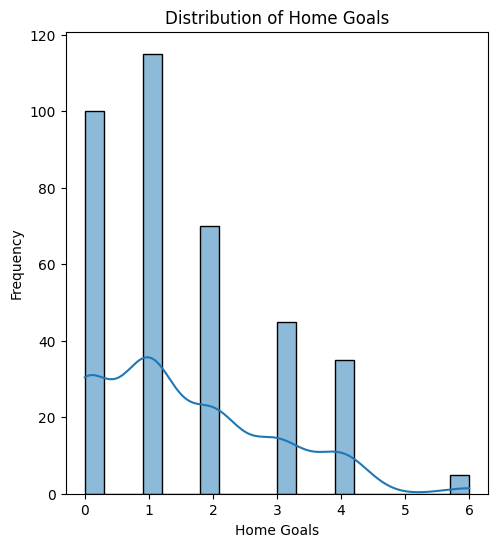

In [16]:
# 2. Distribution of home and away goals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["HomeGoals"], bins=20, kde=True)
plt.title("Distribution of Home Goals")
plt.xlabel("Home Goals")
plt.ylabel("Frequency")



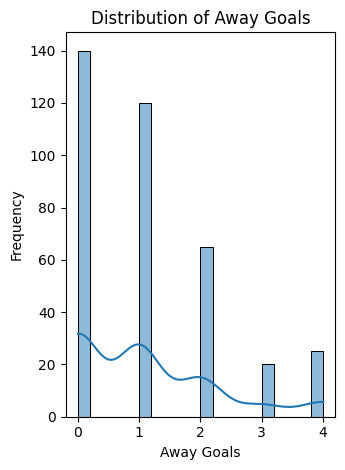

In [15]:
plt.subplot(1, 2, 2)
sns.histplot(df["AwayGoals"], bins=20, kde=True)
plt.title("Distribution of Away Goals")
plt.xlabel("Away Goals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

                 HomeGoals
Home                      
Almería           1.000000
Athletic Club     0.000000
Atlético Madrid   0.500000
Barcelona         1.947368
Betis             0.500000
Celta Vigo        1.500000
Cádiz             0.000000
Elche             0.000000
Espanyol          1.500000
Getafe            0.000000
Girona            2.000000
Mallorca          0.500000
Osasuna           0.500000
Rayo Vallecano    2.500000
Real Madrid       2.315789
Real Sociedad     1.500000
Sevilla           0.500000
Valencia          0.500000
Valladolid        1.500000
Villarreal        1.000000


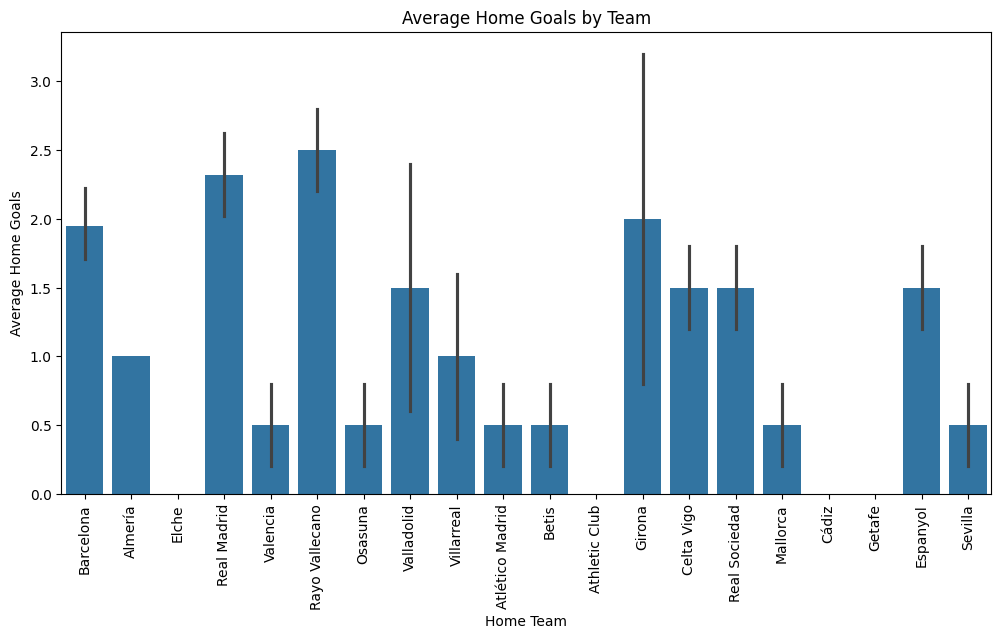

In [39]:
selected_columns = df[['Home', 'HomeGoals']]

grouped_data = selected_columns.groupby('Home').mean('HomeGoals')
print(grouped_data)

plt.figure(figsize=(12, 6))
sns.barplot(x="Home", y="HomeGoals", data=selected_columns)
plt.title("Average Home Goals by Team")
plt.xticks(rotation=90)
plt.xlabel("Home Team")
plt.ylabel("Average Home Goals")


plt.show()


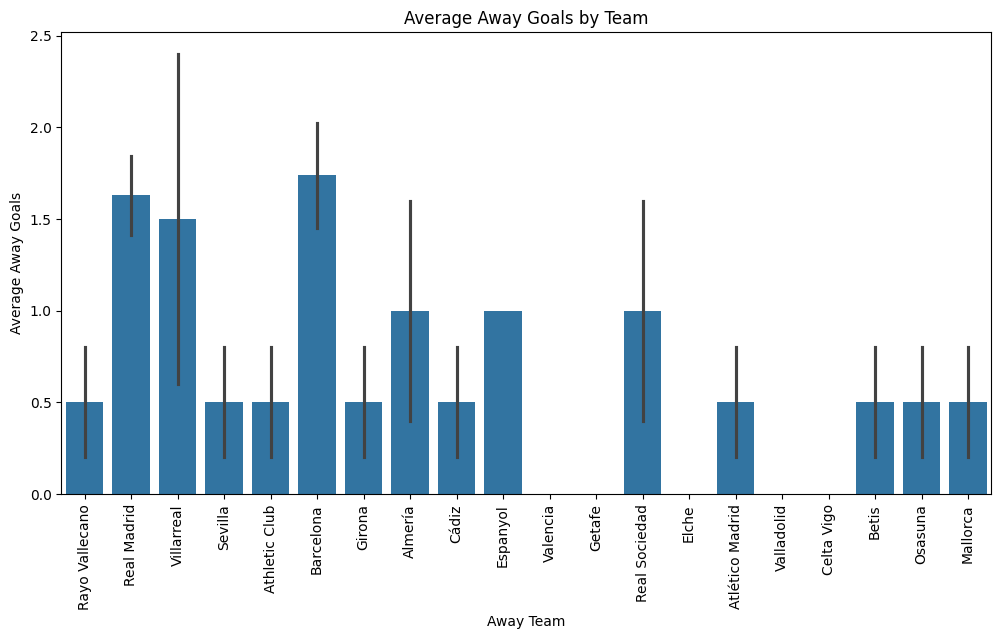

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Away", y="AwayGoals", data=df, estimator=np.mean)
plt.title("Average Away Goals by Team")
plt.xticks(rotation=90)
plt.xlabel("Away Team")
plt.ylabel("Average Away Goals")


plt.show()

<ipython-input-6-2d05feb38407>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Home', y='HomeGoals', color='blue', label='Home Goals', ci=None)
<ipython-input-6-2d05feb38407>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Away', y='AwayGoals', color='orange', label='Away Goals', ci=None)


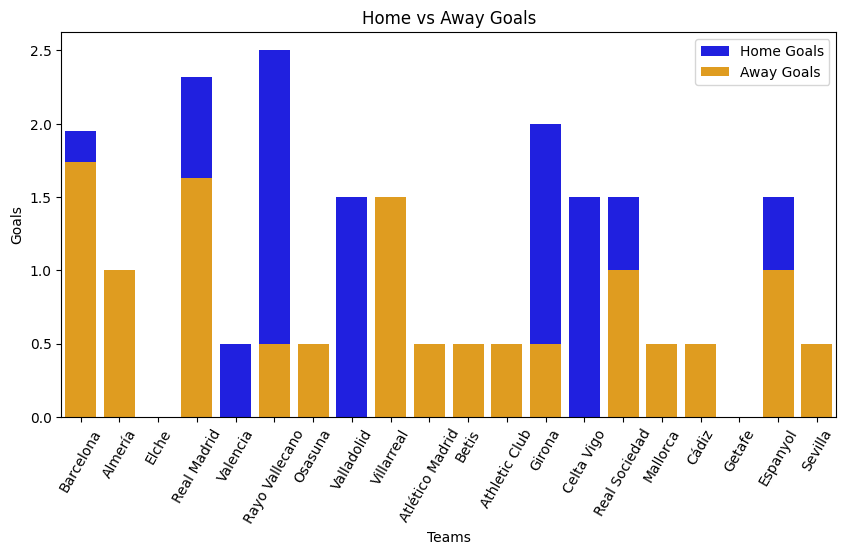

In [6]:


# Total goals by home and away teams
df['total_goals'] = df['HomeGoals'] + df['AwayGoals']

# Plotting home vs away goals
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Home', y='HomeGoals', color='blue', label='Home Goals', ci=None)
sns.barplot(data=df, x='Away', y='AwayGoals', color='orange', label='Away Goals', ci=None)
plt.title('Home vs Away Goals')
plt.xlabel('Teams')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.legend()
plt.show()
